In [18]:
import pyodbc
server = 'DESKTOP-40AG9RR\MTSQLSERVER'
database = 'AdventureWorksDW2012' # enter database name
username = ''
password = '' 
# add appropriate driver name
MsSqlCon = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)

import pandas as pd 

query = '''SELECT * FROM [AdventureWorksDW2012].[dbo].[FactInternetSales]''';
df = pd.read_sql(query, MsSqlCon)
df.tail()

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
60393,485,20140128,20140209,20140204,15868,1,100,6,SO75122,1,...,8.2205,8.2205,21.98,1.7584,0.5495,None,None,2014-01-28,2014-02-09,2014-02-04
60394,225,20140128,20140209,20140204,15868,1,100,6,SO75122,2,...,6.9223,6.9223,8.99,0.7192,0.2248,None,None,2014-01-28,2014-02-09,2014-02-04
60395,485,20140128,20140209,20140204,18759,1,100,6,SO75123,1,...,8.2205,8.2205,21.98,1.7584,0.5495,None,None,2014-01-28,2014-02-09,2014-02-04
60396,486,20140128,20140209,20140204,18759,1,100,6,SO75123,2,...,59.4660,59.4660,159.00,12.7200,3.9750,None,None,2014-01-28,2014-02-09,2014-02-04
60397,225,20140128,20140209,20140204,18759,1,100,6,SO75123,3,...,6.9223,6.9223,8.99,0.7192,0.2248,None,None,2014-01-28,2014-02-09,2014-02-04


In [19]:
df=df[df['OrderDate']<= "2013-12-28"]
df.tail(15)

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
58174,604,20131228,20140109,20140104,23884,1,100,4,SO74141,1,...,343.6496,343.6496,539.99,43.1992,13.4998,None,None,2013-12-28,2014-01-09,2014-01-04
58175,471,20131228,20140109,20140104,23884,1,100,4,SO74141,2,...,23.7490,23.7490,63.50,5.0800,1.5875,None,None,2013-12-28,2014-01-09,2014-01-04
58176,384,20131228,20140109,20140104,22253,1,100,1,SO74142,1,...,713.0798,713.0798,1120.49,89.6392,28.0123,None,None,2013-12-28,2014-01-09,2014-01-04
58177,490,20131228,20140109,20140104,22253,1,100,1,SO74142,2,...,41.5723,41.5723,53.99,4.3192,1.3498,None,None,2013-12-28,2014-01-09,2014-01-04
58178,606,20131228,20140109,20140104,28517,1,98,10,SO74143,1,...,343.6496,343.6496,539.99,43.1992,13.4998,None,None,2013-12-28,2014-01-09,2014-01-04
58179,479,20131228,20140109,20140104,28517,1,98,10,SO74143,2,...,3.3623,3.3623,8.99,0.7192,0.2248,None,None,2013-12-28,2014-01-09,2014-01-04
58180,477,20131228,20140109,20140104,28517,1,98,10,SO74143,3,...,1.8663,1.8663,4.99,0.3992,0.1248,None,None,2013-12-28,2014-01-09,2014-01-04
58181,463,20131228,20140109,20140104,28517,1,98,10,SO74143,4,...,9.1593,9.1593,24.49,1.9592,0.6123,None,None,2013-12-28,2014-01-09,2014-01-04
58182,574,20131228,20140109,20140104,12314,1,100,8,SO74144,1,...,1481.9379,1481.9379,2384.07,190.7256,59.6018,None,None,2013-12-28,2014-01-09,2014-01-04
58183,222,20131228,20140109,20140104,12314,1,100,8,SO74144,2,...,13.0863,13.0863,34.99,2.7992,0.8748,None,None,2013-12-28,2014-01-09,2014-01-04


In [20]:
import numpy as np

dataset=df.groupby("OrderDate")["SalesAmount"].aggregate([np.sum]).reset_index()
dataset.columns = ("Tarih","Deger")
dataset.dtypes

Tarih    datetime64[ns]
Deger           float64
dtype: object

In [21]:
dataset.tail(50)

,Tarih,Deger
1043,2013-11-09,60381.90
1044,2013-11-10,45438.25
1045,2013-11-11,60012.34
1046,2013-11-12,63750.07
1047,2013-11-13,69543.00
1048,2013-11-14,54233.28
1049,2013-11-15,47690.51
1050,2013-11-16,62944.30
1051,2013-11-17,79066.27
1052,2013-11-18,67912.71


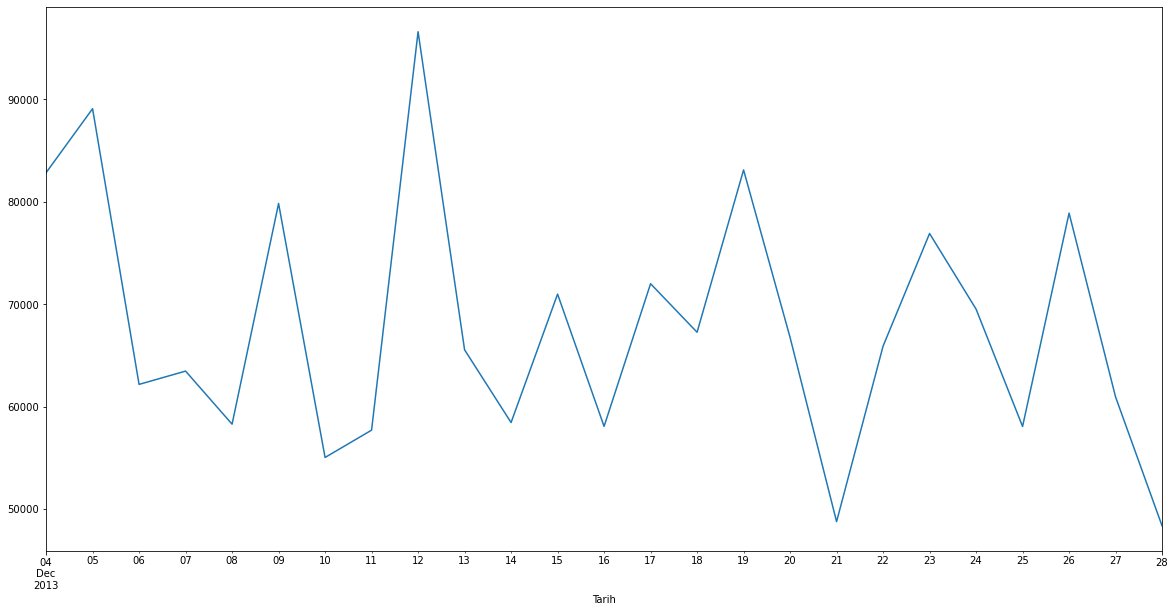

In [22]:
from matplotlib import pyplot as plt

seri = pd.Series(dataset['Deger'].values, index = dataset['Tarih'])
seri
plt.figure(figsize=(20,10))
seri.iloc[-25:].plot()


In [23]:
import time
import numpy as np
from datetime import datetime, timedelta, date, time

TableStatsdict ={'Tarih':[],'Deger':[]}
max_date=dataset["Tarih"].max()+pd.DateOffset(1)


for i in range(12):
    TableStatsdict["Tarih"].append(max_date+pd.DateOffset(i))   
    TableStatsdict["Deger"].append(np.nan)                                   



Dataset_Fcast=pd.DataFrame.from_dict(TableStatsdict)
Dataset_Fcast

,Tarih,Deger
0,2013-12-29,NaN
1,2013-12-30,NaN
2,2013-12-31,NaN
3,2014-01-01,NaN
4,2014-01-02,NaN
5,2014-01-03,NaN
6,2014-01-04,NaN
7,2014-01-05,NaN
8,2014-01-06,NaN
9,2014-01-07,NaN


In [24]:
# Dataset_Add=pd.DataFrame.from_dict(TableStatsdict)
dataset=dataset.append(Dataset_Fcast,ignore_index=True)
dataset.tail(25)


,Tarih,Deger
1080,2013-12-16,58087.49
1081,2013-12-17,72013.14
1082,2013-12-18,67275.47
1083,2013-12-19,83119.46
1084,2013-12-20,66769.39
1085,2013-12-21,48791.78
1086,2013-12-22,65922.19
1087,2013-12-23,76914.61
1088,2013-12-24,69533.64
1089,2013-12-25,58080.78


In [25]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from statsmodels.tsa.api import  SimpleExpSmoothing, Holt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
import datetime

# df_train = seri.iloc[:-12]
# df_test = seri.iloc[-12:]

# date_time_start_str = df_test.index.min()
# date_time_start_obj = datetime.datetime.strptime(date_time_start_str, '%m/%d/%Y')
# date_time_end_str = df_test.index.max()
# date_time_end_obj = datetime.datetime.strptime(date_time_end_str, '%m/%d/%Y')


# df['Kur'].plot()
# plt.show()



model1 = HWES(seri.values,trend="add",seasonal_periods=4,seasonal="mul")
fitted1 = model1.fit(optimized=True)
forecast1 = fitted1.forecast(steps=12)


model2=SimpleExpSmoothing(seri)
fitted2 = model2.fit(optimized=True)
forecast2 = fitted2.forecast(steps=12)


model3 = HWES(seri,trend="multiplicative",seasonal=None)
fitted3 = model3.fit(optimized=True)
forecast3 = fitted3.forecast(steps=12)


model4 =  ARIMA(seri, order=(0, 0, 1))
fitted4 = model4.fit()
forecast4 = fitted4.predict(start=1093, end=1093+11)

model5 =  ARIMA(seri, order=(2, 0, 1))
fitted5 = model5.fit()
forecast5 = fitted5.predict(start=1093, end=1093+11)

model6 =  ARIMA(seri, order=(1, 1, 1))
fitted6 = model6.fit()
forecast6 = fitted6.predict(start=1093, end=1093+11,typ='levels')

model7 = SARIMAX(seri, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
fitted7 = model7.fit(disp=False)
forecast7 = fitted7.predict(start=1093, end=1093+11,typ='levels')


In [26]:
# forcast ve tarihi birleştirip frame'ler yapmalı
df_forecast1=pd.DataFrame({'Tarih':Dataset_Fcast["Tarih"], 'Forecast1':forecast1})
df_forecast2=pd.DataFrame({'Tarih':Dataset_Fcast["Tarih"], 'Forecast2':forecast2.values})
df_forecast3=pd.DataFrame({'Tarih':Dataset_Fcast["Tarih"], 'Forecast3':forecast3.values})
df_forecast4=pd.DataFrame({'Tarih':Dataset_Fcast["Tarih"], 'Forecast4':forecast4.values})
df_forecast5=pd.DataFrame({'Tarih':Dataset_Fcast["Tarih"], 'Forecast5':forecast5.values})
df_forecast6=pd.DataFrame({'Tarih':Dataset_Fcast["Tarih"], 'Forecast6':forecast6.values})
df_forecast7=pd.DataFrame({'Tarih':Dataset_Fcast["Tarih"], 'Forecast7':forecast7.values})



In [27]:
df_total=pd.merge(dataset, pd.merge(df_forecast1, 
                                   pd.merge(df_forecast2, 
                                            pd.merge(df_forecast3, 
                                                     pd.merge(df_forecast4, 
                                                              pd.merge(df_forecast5, 
                                                                       pd.merge(df_forecast6, df_forecast7,
                                                                                on='Tarih', how='outer'),
                                                                       on='Tarih', how='outer'),
                                                              on='Tarih', how='outer'),
                                                     on='Tarih', how='outer'),
                                            on='Tarih', how='outer'), 
                                   on='Tarih', how='outer'), on='Tarih', how='left')

df_total

,Tarih,Deger,Forecast1,Forecast2,Forecast3,Forecast4,Forecast5,Forecast6,Forecast7
0,2010-12-29,14477.3382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-12-30,13931.5200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-12-31,15012.1782,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-01-01,7156.5400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-01-02,15012.1782,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1100,2014-01-05,NaN,71579.359904,64961.600419,67296.459027,26814.123139,64614.846973,64999.664976,64999.664976
1101,2014-01-06,NaN,67479.561863,64961.600419,67418.965725,26814.123139,64593.166964,64999.664976,64999.664976
1102,2014-01-07,NaN,67774.033027,64961.600419,67541.695434,26814.123139,64571.499389,64999.664976,64999.664976
1103,2014-01-08,NaN,70532.268427,64961.600419,67664.648560,26814.123139,64549.844242,64999.664976,64999.664976


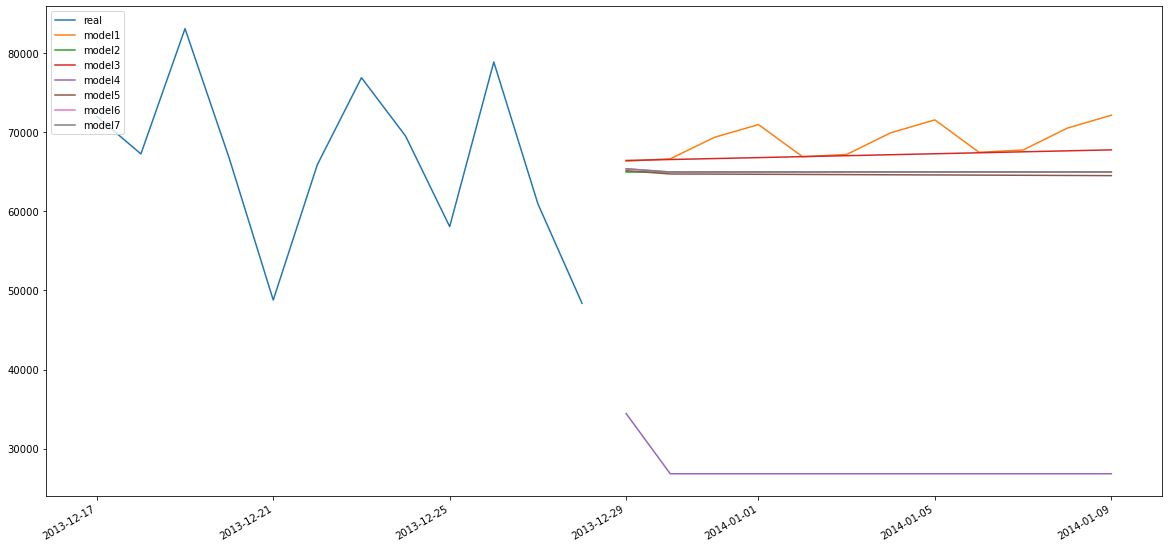

In [28]:
seri_plot=seri.iloc[-12:]


#Plotting multiple sets of data
plt.figure(figsize=(20,10))

plt.plot(seri_plot.index,seri_plot.values,label='real') # Setting up legends
# plt.plot(df_test.index,df_test.values,label='real') # Setting up legends
plt.plot(Dataset_Fcast["Tarih"],forecast1,label='model1') # Setting up legends
plt.plot(Dataset_Fcast["Tarih"],forecast2,label='model2') # Setting up legends
plt.plot(Dataset_Fcast["Tarih"],forecast3,label='model3') # Setting up legends
plt.plot(Dataset_Fcast["Tarih"],forecast4,label='model4') # Setting up legends
plt.plot(Dataset_Fcast["Tarih"],forecast5,label='model5') # Setting up legends
plt.plot(Dataset_Fcast["Tarih"],forecast6,label='model6') # Setting up legends
plt.plot(Dataset_Fcast["Tarih"],forecast7,label='model7') # Setting up legends
# plt.plot(df_test.index,forecast8.values,label='model8') # Setting up legends
# # plt.xlabel("X - Axis")
# # plt.ylabel("Y - Axis")

plt.legend(loc=2) #legend location : https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.legend.html
plt.gcf().autofmt_xdate() # x ekseni format düzenlemesi
plt.show()

In [31]:
from sqlalchemy import create_engine

con = create_engine('mssql+pyodbc://@DESKTOP-40AG9RR\MTSQLSERVER/AdventureWorksDW2012?driver=SQL Server')
con.connect() 

df_total.to_sql('TableForecast', con, if_exists='replace', index = False)